# Expectation-Maximization algorithm

In [1]:
using Distributions

## Genetics example

### Obtaining the estimate

In [2]:
θ = 0.5

x = [125, 18, 20, 34]

for i = 1:9
    num = x[1] * θ / (2 + θ) + x[4]
    dem = x[1] * θ / (2 + θ) + x[2] + x[3] + x[4]
    global θ = num / dem
    println("Iteration $i: θ = $θ")
end

Iteration 1: θ = 0.6082474226804123
Iteration 2: θ = 0.6243210503692704
Iteration 3: θ = 0.6264888790796673
Iteration 4: θ = 0.6267773223473097
Iteration 5: θ = 0.6268156321100443
Iteration 6: θ = 0.6268207190193078
Iteration 7: θ = 0.6268213944559841
Iteration 8: θ = 0.6268214841396688
Iteration 9: θ = 0.6268214960477559


### Obtaining the standard error

In [3]:
y_expected = x[1] * θ / (2 + θ)
inf_full = (y_expected + x[4]) / θ^2 + (x[2] + x[3]) / (1 - θ)^2
inf_missing = x[1] * 2 / (θ * (θ + 2)^2)
inf_observed = inf_full - inf_missing
se = sqrt(1 / inf_observed)

0.05146734934660761

In [4]:
q975 = quantile(Normal(), 0.975)
ml_ci = [θ - q975 * se, θ + q975 * se]

2-element Vector{Float64}:
 0.5259473449486638
 0.7276956471468481

## Clustering example

In [5]:
using DataFrames
using Distributions
using CairoMakie
using StatsBase

μ = [0.6375, 0.6565]
σ = [0.02, 0.012]
prob = [0.4, 0.6]
X = Normal.(μ, σ)

2-element Vector{Distributions.Normal{Float64}}:
 Distributions.Normal{Float64}(μ=0.6375, σ=0.02)
 Distributions.Normal{Float64}(μ=0.6565, σ=0.012)

In [6]:
Z = sample([1, 2], Weights(prob), 5000)
x = rand.(X[Z])

5000-element Vector{Float64}:
 0.6401831109994224
 0.6080176764056248
 0.646348347139812
 0.6318353439966221
 0.672244593558383
 0.641159987575857
 0.6360838643159492
 0.6695465373698469
 0.6515161172090029
 0.6394109405904254
 ⋮
 0.6647164207603071
 0.6419731795775144
 0.6381316983852159
 0.6602033445574275
 0.6405310934628787
 0.6616844215964846
 0.6131294742690928
 0.6400736712679207
 0.6564036425731965

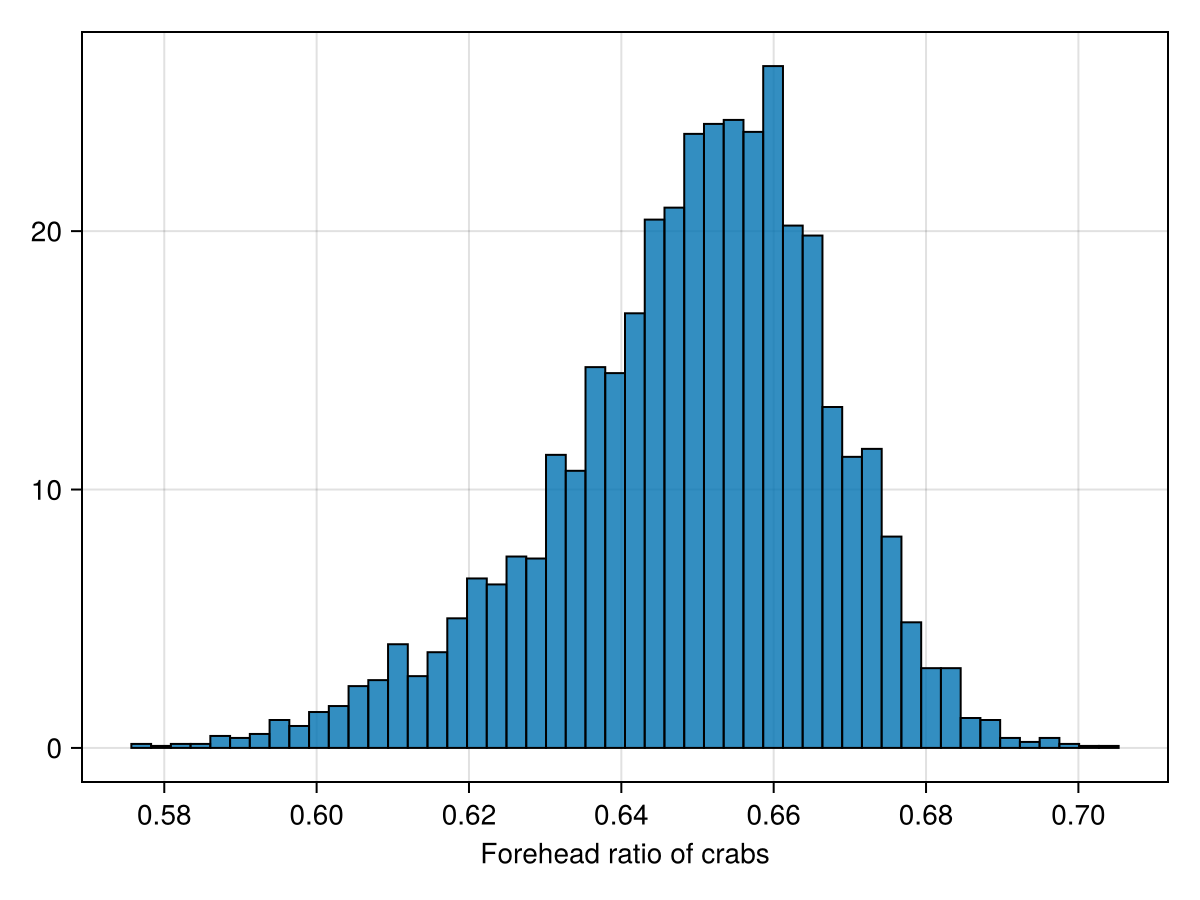

In [7]:
axis_args = (xticks = 0.54:0.02:0.74, xlabel = "Forehead ratio of crabs")
hist(x, bins = 50, strokewidth = 1, normalization = :pdf, axis = axis_args)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*